In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
gs=pd.read_csv("../input/gender_submission.csv")
y_train=train[['Survived']]
print(y_train.head())
x_train=train.drop('Survived', axis=1)
print(x_train.info())
print(test.info())

   Survived
0         0
1         1
2         1
3         1
4         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-nu

In [3]:
total=x_train.isnull().sum().sort_values(ascending=False)
percentage=round(total/len(x_train)*100,2)
pd.concat([total, percentage], axis = 1,keys= ['Total', 'Percentage'])

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [4]:
total=test.isnull().sum().sort_values(ascending=False)
percentage=round(total/len(test)*100,2)
pd.concat([total, percentage], axis = 1,keys= ['Total', 'Percentage'])

,Total,Percentage
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [5]:
print(x_train.Embarked.value_counts(dropna=False))
x_train[x_train.Embarked.isnull()]

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
print(x_train['Fare'].where(x_train['Embarked']=='S').where(x_train['Pclass']==1).median())
print(x_train['Fare'].where(x_train['Embarked']=='C').where(x_train['Pclass']==1).median())
print(x_train['Fare'].where(x_train['Embarked']=='Q').where(x_train['Pclass']==1).median())

52.0
78.2667
90.0


In [7]:
x_train.Embarked.fillna('C', inplace=True)
x_train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)
print(x_train.head())
print(test.head())

   PassengerId  Pclass   ...        Fare Embarked
0            1       3   ...      7.2500        S
1            2       1   ...     71.2833        C
2            3       3   ...      7.9250        S
3            4       1   ...     53.1000        S
4            5       3   ...      8.0500        S

[5 rows x 10 columns]
   PassengerId  Pclass   ...        Fare Embarked
0          892       3   ...      7.8292        Q
1          893       3   ...      7.0000        S
2          894       2   ...      9.6875        Q
3          895       3   ...      8.6625        S
4          896       3   ...     12.2875        S

[5 rows x 10 columns]


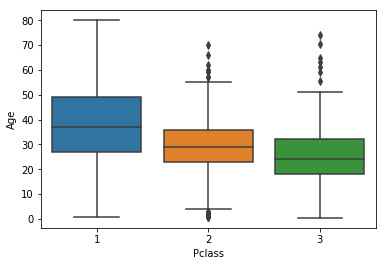

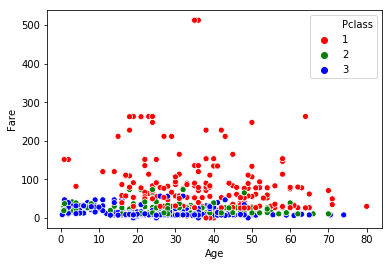

In [8]:
sns.boxplot(x="Pclass", y="Age", data=x_train)
plt.figure()
sns.scatterplot(x='Age',y='Fare',data=x_train,hue='Pclass',palette=['r','g','b'], legend="full")
plt.show()

In [9]:
total=[x_train,test]
for each in total:
    avr_age=each['Age'].mean()
    std_age=each['Age'].std()
    nan_age = each['Age'].isnull().sum()
    nan_age_random_list = np.random.randint(avr_age - std_age, avr_age + std_age, size=nan_age)
    each['Age'][np.isnan(each['Age'])] = nan_age_random_list
    each['Age'] = each['Age'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

x_train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

x_train.drop("Ticket",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)

codes1 = {'male':0, 'female':1}
x_train['Sex'] = x_train['Sex'].map(codes1)
test['Sex'] = test['Sex'].map(codes1)

codes2 = {'S':0, 'C':1, 'Q':2}
x_train['Embarked'] = x_train['Embarked'].map(codes2)
test['Embarked'] = test['Embarked'].map(codes2)

In [11]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=len(x_train.columns)))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

classifier.fit(x_train,y_train, batch_size=10, epochs=100)

eval_model=classifier.evaluate(x_train, y_train)
eval_model

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
891/891 [==============================] - 1s 988us/step - loss: 0.6900 - acc: 0.6038
Epoch 2/100
891/891 [==============================] - 0s 139us/step - loss: 0.6835 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 131us/step - loss: 0.6770 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 139us/step - loss: 0.6711 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 133us/step - loss: 0.6678 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 139us/step - loss: 0.6665 - acc: 0.6162
Epoch 7/100
891/891 [==============================] - 0s 131us/step - loss: 0.6659 - acc: 0.6162
Epoch 8/100
891/891 [==============================] - 0s 133us/step - loss: 0.6655 - acc: 0.6162
Epoch 9/100
891/891 [==============================] - 0s 137us/step - loss: 0.6644 - acc: 0.616

[0.4814403357128503, 0.8035914711277894]

In [12]:
y_pred=classifier.predict(test)
y_pred =np.array([round(x[0]) for x in y_pred])
y_pred=y_pred.astype(int)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]


In [13]:
ans = pd.DataFrame({'PassengerId' : test['PassengerId'] , 'Survived': y_pred})
ans.to_csv('submit.csv', index = False)
ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
